In [1]:
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [2]:
dataset = pd.read_csv('table.csv')

In [3]:
dataset

,Unnamed: 0,Score,Action
0,0,0.00,operator
1,1,19.55,reask
2,2,24.34,reask
3,3,29.26,reask
4,4,0.00,operator
...,...,...,...
362,406,37.35,reask
363,407,21.30,reask
364,408,12.93,reask
365,409,30.21,operator


In [4]:
dataset['Score'].value_counts()

100.00    15
0.00      12
25.87     10
38.01      6
30.70      5
          ..
7.07       1
88.94      1
37.35      1
9.13       1
21.79      1
Name: Score, Length: 287, dtype: int64

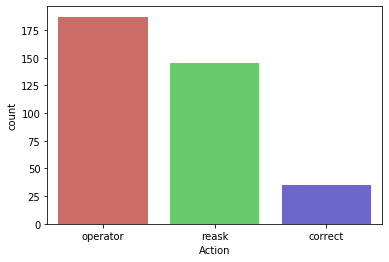

In [5]:
sns.countplot(x='Action', data=dataset, palette='hls')

In [6]:
x = pd.DataFrame(dataset.iloc[:, 1])
y = pd.DataFrame(dataset.iloc[:, -1])

In [7]:
x

,Score
0,0.00
1,19.55
2,24.34
3,29.26
4,0.00
...,...
362,37.35
363,21.30
364,12.93
365,30.21


In [8]:
y

,Action
0,operator
1,reask
2,reask
3,reask
4,operator
...,...
362,reask
363,reask
364,reask
365,operator


In [9]:
# Making undersampling train data
rus = RandomUnderSampler(random_state=42)
x_under, y_under = rus.fit_resample(x.values, y.values)
# Reverting back to dataframes
x_under = pd.DataFrame(x_under)
y_under = pd.DataFrame(y_under)
y_under.columns = ['Action']

undersampled_data = pd.concat([x_under, y_under], axis=1)

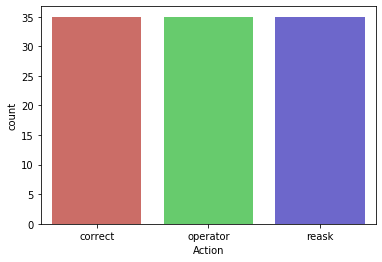

In [10]:
sns.countplot(x='Action', data=undersampled_data, palette='hls')

In [11]:
# Making uppersampling data
ros = RandomOverSampler(random_state=42)
x_over = [x for x in x.values]
y_over = [y[0] for y in y.values]
x_over, y_over = ros.fit_resample(x_over, y_over)

# Reverting back to dataframes
x_over = pd.DataFrame(x_over)
y_over = pd.DataFrame(y_over)
y_over.columns = ['Action']

oversampled_data = pd.concat([x_over, y_over], axis=1)

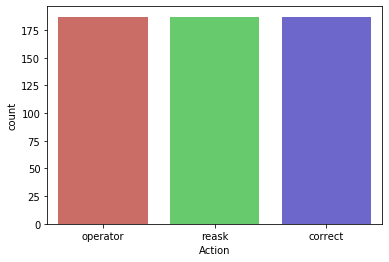

In [12]:
sns.countplot(x='Action', data=oversampled_data, palette='hls')

## Creating test and train data

In [13]:
# Making undersampled train data
X_train_pure, X_test_pure, y_train_pure, y_test_pure = train_test_split(x, y, test_size=0.2, random_state=1)

In [14]:
# Making undersampled train data
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(x_under, y_under, test_size=0.2, random_state=1)

In [15]:
# Making oversampled train data
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(x_over, y_over, test_size=0.2, random_state=1)

In [16]:
classes = y['Action'].unique().tolist()
classes

['operator', 'reask', 'correct']

In [17]:
def plot_conf_matrix(cm, title, classes):
    plt.imshow(cnf, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic regression

### Pure

In [18]:
logmodel_pure = LogisticRegression(multi_class='ovr')
logmodel_pure.fit(X_train_pure, y_train_pure)

C:\Users\osmiy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred_pure = logmodel_pure.predict(X_test_pure)

In [20]:
print(f"Accuracy: {logmodel_pure.score(X_test_pure, y_test_pure)}")

Accuracy: 0.5


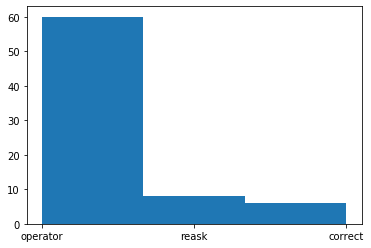

In [21]:
plt.hist(y_pred_pure, bins=3)
plt.show()

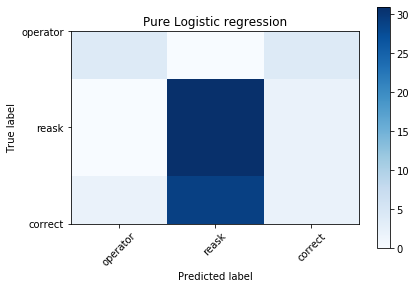

In [22]:
cnf = confusion_matrix(y_test_pure, y_pred_pure)
plot_conf_matrix(cnf, "Pure Logistic regression", classes)

In [23]:
report = classification_report(y_test_pure, y_pred_pure, target_names = classes)
print(report)

              precision    recall  f1-score   support

    operator       0.67      0.50      0.57         8
       reask       0.52      0.94      0.67        33
     correct       0.25      0.06      0.10        33

    accuracy                           0.50        74
   macro avg       0.48      0.50      0.45        74
weighted avg       0.41      0.50      0.40        74



### Undersampling

In [24]:
logmodel_under = LogisticRegression(multi_class='ovr')
logmodel_under.fit(X_train_under, y_train_under)

C:\Users\osmiy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred_under = logmodel_under.predict(X_test_under)

In [26]:
print(f"Accuracy: {logmodel_under.score(X_test_under, y_test_under)}")

Accuracy: 0.6666666666666666


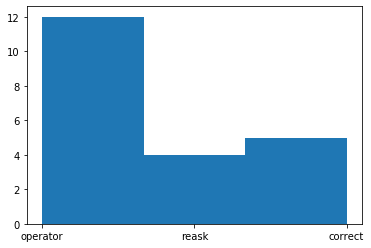

In [27]:
plt.hist(y_pred_under, bins=3)
plt.show()

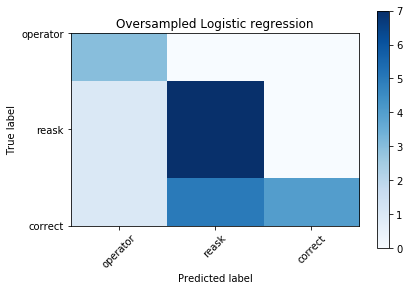

In [28]:
cnf = confusion_matrix(y_test_under, y_pred_under)
plot_conf_matrix(cnf, "Oversampled Logistic regression", classes)

In [29]:
report = classification_report(y_test_under, y_pred_under, target_names = classes)
print(report)

              precision    recall  f1-score   support

    operator       0.60      1.00      0.75         3
       reask       0.58      0.88      0.70         8
     correct       1.00      0.40      0.57        10

    accuracy                           0.67        21
   macro avg       0.73      0.76      0.67        21
weighted avg       0.78      0.67      0.65        21



### Oversampling

In [30]:
logmodel_over = LogisticRegression(multi_class='ovr')
logmodel_over.fit(X_train_over, y_train_over)

C:\Users\osmiy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred_over = logmodel_over.predict(X_test_over)

In [32]:
print(f"Accuracy: {logmodel_over.score(X_test_over, y_test_over)}")

Accuracy: 0.5132743362831859


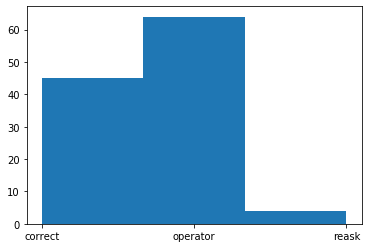

In [33]:
plt.hist(y_pred_over, bins=3)
plt.show()

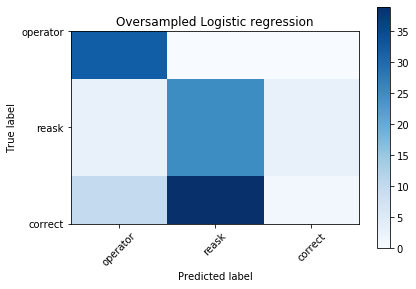

In [34]:
cnf = confusion_matrix(y_test_over, y_pred_over)
plot_conf_matrix(cnf, "Oversampled Logistic regression", classes)

In [35]:
report = classification_report(y_test_over, y_pred_over, target_names = classes)
print(report)

              precision    recall  f1-score   support

    operator       0.71      1.00      0.83        32
       reask       0.39      0.81      0.53        31
     correct       0.25      0.02      0.04        50

    accuracy                           0.51       113
   macro avg       0.45      0.61      0.46       113
weighted avg       0.42      0.51      0.40       113



## SVC

### Pure

In [36]:
clf_pure = SVC()
clf_pure.fit(X_train_pure, y_train_pure)

C:\Users\osmiy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
y_pred_pure = clf_pure.predict(X_test_pure)

In [38]:
print(f"Accuracy: {clf_pure.score(X_test_pure, y_test_pure)}")

Accuracy: 0.5945945945945946


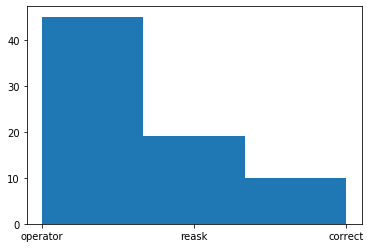

In [39]:
plt.hist(y_pred_pure, bins=3)
plt.show()

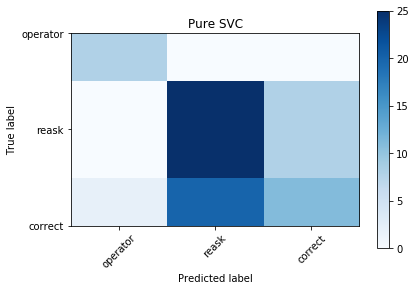

In [40]:
cnf = confusion_matrix(y_test_pure, y_pred_pure)
plot_conf_matrix(cnf, "Pure SVC", classes)

In [41]:
report = classification_report(y_test_pure, y_pred_pure, target_names = classes)
print(report)

              precision    recall  f1-score   support

    operator       0.80      1.00      0.89         8
       reask       0.56      0.76      0.64        33
     correct       0.58      0.33      0.42        33

    accuracy                           0.59        74
   macro avg       0.64      0.70      0.65        74
weighted avg       0.59      0.59      0.57        74



### Undersampling

In [42]:
clf_under = SVC()
clf_under.fit(X_train_under, y_train_under)

C:\Users\osmiy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
y_pred_under = clf_under.predict(X_test_under)

In [44]:
print(f"Accuracy: {clf_under.score(X_test_under, y_test_under)}")

Accuracy: 0.6666666666666666


In [45]:
dummy = DummyClassifier(strategy='most_frequent',random_state=0)
dummy.fit(X_train_under, y_train_under)
print(f"Accuracy dummy: {dummy.score(X_test_under, y_test_under)}")

Accuracy dummy: 0.14285714285714285


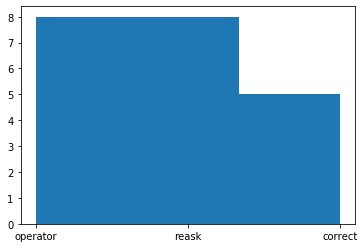

In [46]:
plt.hist(y_pred_under, bins=3)
plt.show()

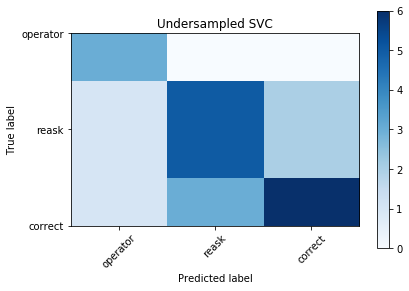

In [47]:
cnf = confusion_matrix(y_test_under, y_pred_under)
plot_conf_matrix(cnf, "Undersampled SVC", classes)

In [48]:
report = classification_report(y_test_under, y_pred_under, target_names = classes)
print(report)

              precision    recall  f1-score   support

    operator       0.60      1.00      0.75         3
       reask       0.62      0.62      0.62         8
     correct       0.75      0.60      0.67        10

    accuracy                           0.67        21
   macro avg       0.66      0.74      0.68        21
weighted avg       0.68      0.67      0.66        21



### Oversampling

In [49]:
clf_over = SVC()
clf_over.fit(X_train_over, y_train_over)

C:\Users\osmiy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
y_pred_over = clf_over.predict(X_test_over)

In [51]:
print(f"Accuracy: {clf_over.score(X_test_over, y_test_over)}")

Accuracy: 0.6460176991150443


In [52]:
dummy = DummyClassifier(strategy='most_frequent',random_state=0)
dummy.fit(X_train_over, y_train_over)
print(f"Accuracy dummy: {dummy.score(X_test_over, y_test_over)}")

Accuracy dummy: 0.2743362831858407


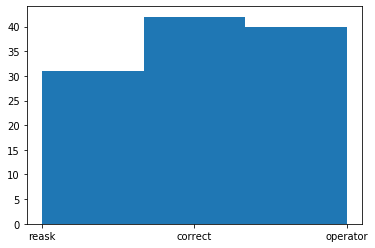

In [53]:
plt.hist(y_pred_over, bins=3)
plt.show()

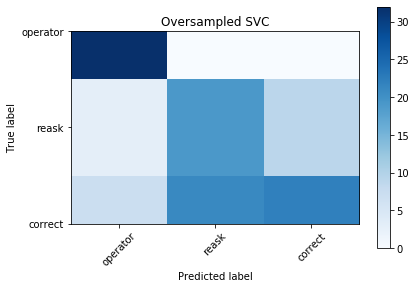

In [54]:
cnf = confusion_matrix(y_test_over, y_pred_over)
plot_conf_matrix(cnf, "Oversampled SVC", classes)

In [55]:
report = classification_report(y_test_over, y_pred_over, target_names = classes)
print(report)

              precision    recall  f1-score   support

    operator       0.76      1.00      0.86        32
       reask       0.47      0.61      0.54        31
     correct       0.71      0.44      0.54        50

    accuracy                           0.65       113
   macro avg       0.65      0.68      0.65       113
weighted avg       0.66      0.65      0.63       113



## SVC with cross-validation for oversampled dataset

In [56]:
clf_over_cross = SVC()

In [57]:
scores = cross_val_score(clf_over_cross, x_over, y_over, cv=5, scoring="f1_macro")

C:\Users\osmiy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmiy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmiy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\osmiy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [60]:
print(f"SVC F1-macro scores: {scores}")

SVC F1-macro scores: [0.67738383 0.65590188 0.74403428 0.74954955 0.63816339]


In [62]:
clf_over_cross.fit(x_over, y_over)

C:\Users\osmiy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
pred = clf_over_cross.predict(np.array([55.6]).reshape(1, -1))

array(['reask'], dtype=object)

In [77]:
lin_pred = clf_over_cross.predict(np.linspace(1, 100, 1000).reshape(-1, 1))

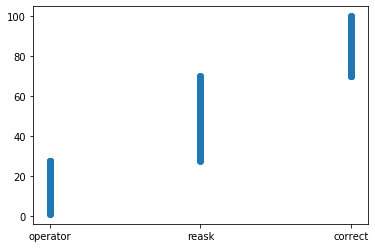

In [82]:
plt.scatter(lin_pred, np.linspace(1, 100, 1000))

## Final function

In [80]:
def get_label(model, value):
    pred = model.predict(np.array([value]).reshape(1, -1))
    
    return pred[0]

In [81]:
get_label(clf_over_cross, 55.6)

'reask'